In [1]:
import pandas as pd
import sklearn.model_selection
from sklearn.feature_extraction.text import CountVectorizer
import plotnine as p9

In [2]:
train = pd.concat([pd.read_csv('../data/with_validation_splits/IMDb/train.csv'), pd.read_csv('../data/with_validation_splits/IMDb/validation.csv')])
test = pd.read_csv('../data/with_validation_splits/IMDb/train.csv')

In [3]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train['text'])
train['length'] = X.sum(axis = 1)

X = vectorizer.fit_transform(test['text'])
test['length'] = X.sum(axis = 1)

In [4]:
print(test.sort_values('length', ascending = True).head(10)[['text', 'length']].values, flush = True)

[["I wouldn't rent this one even on dollar rental night." 9]
 ['This movie is terrible but it has some good effects.' 10]
 ['Ming The Merciless does a little Bardwork and a movie most foul!' 10]
 ['Adrian Pasdar is excellent is this film. He makes a fascinating woman.'
  11]
 ["You'd better choose Paul Verhoeven's even if you have watched it." 11]
 ['Long, boring, blasphemous. Never have I been so glad to see ending credits roll.'
  13]
 ['Comment this movie is impossible. Is terrible, very improbable, bad interpretation e direction. Not look!!!!!'
  14]
 ["Smallville episode Justice is the best episode of Smallville ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! It's my favorite episode of Smallville! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !

# Top 3500 each

In [5]:
def get_top_N(top_N):
  train_df = train.nlargest(top_N, 'length').sample(frac = 1, random_state = 42).reset_index(drop = True)
  test_df = test.nlargest(top_N, 'length').sample(frac = 1, random_state = 42).reset_index(drop = True)
  test_df, validation_df = sklearn.model_selection.train_test_split(test_df, test_size = 0.33, random_state = 42, stratify = test_df['label'])
  validation_df = validation_df.sample(frac = 1, random_state = 42).reset_index(drop = True)

  return train_df, validation_df, test_df

In [6]:
def describe_top_N(top_N):
  train_df, validation_df, test_df = get_top_N(top_N)

  print('Labels:', flush = True)

  print('>> Train:', flush = True)
  print(train_df['label'].value_counts(normalize = True), flush = True)
  print('>> Validation:', flush = True)
  print(validation_df['label'].value_counts(normalize = True), flush = True)
  print('>> Test:', flush = True)
  print(test_df['label'].value_counts(normalize = True), flush = True)

  print('', flush = True)

  print('Text length:', flush = True)
  print('>> Train:', flush = True)
  print(train_df['length'].describe(), flush = True)
  print('>> Validation:', flush = True)
  print(validation_df['length'].describe(), flush = True)
  print('>> Test:', flush = True)
  print(test_df['length'].describe(), flush = True)

In [7]:
describe_top_N(3500)

Labels:
>> Train:
1    0.529714
0    0.470286
Name: label, dtype: float64
>> Validation:
1    0.527273
0    0.472727
Name: label, dtype: float64
>> Test:
1    0.526652
0    0.473348
Name: label, dtype: float64

Text length:
>> Train:
count    3500.000000
mean      570.958857
std       175.698049
min       382.000000
25%       437.750000
50%       518.000000
75%       658.000000
max      2386.000000
Name: length, dtype: float64
>> Validation:
count    1155.000000
mean      528.474459
std       181.847842
min       341.000000
25%       386.500000
50%       467.000000
75%       615.500000
max      1789.000000
Name: length, dtype: float64
>> Test:
count    2345.000000
mean      525.748827
std       173.730553
min       341.000000
25%       394.000000
50%       473.000000
75%       602.000000
max      1830.000000
Name: length, dtype: float64


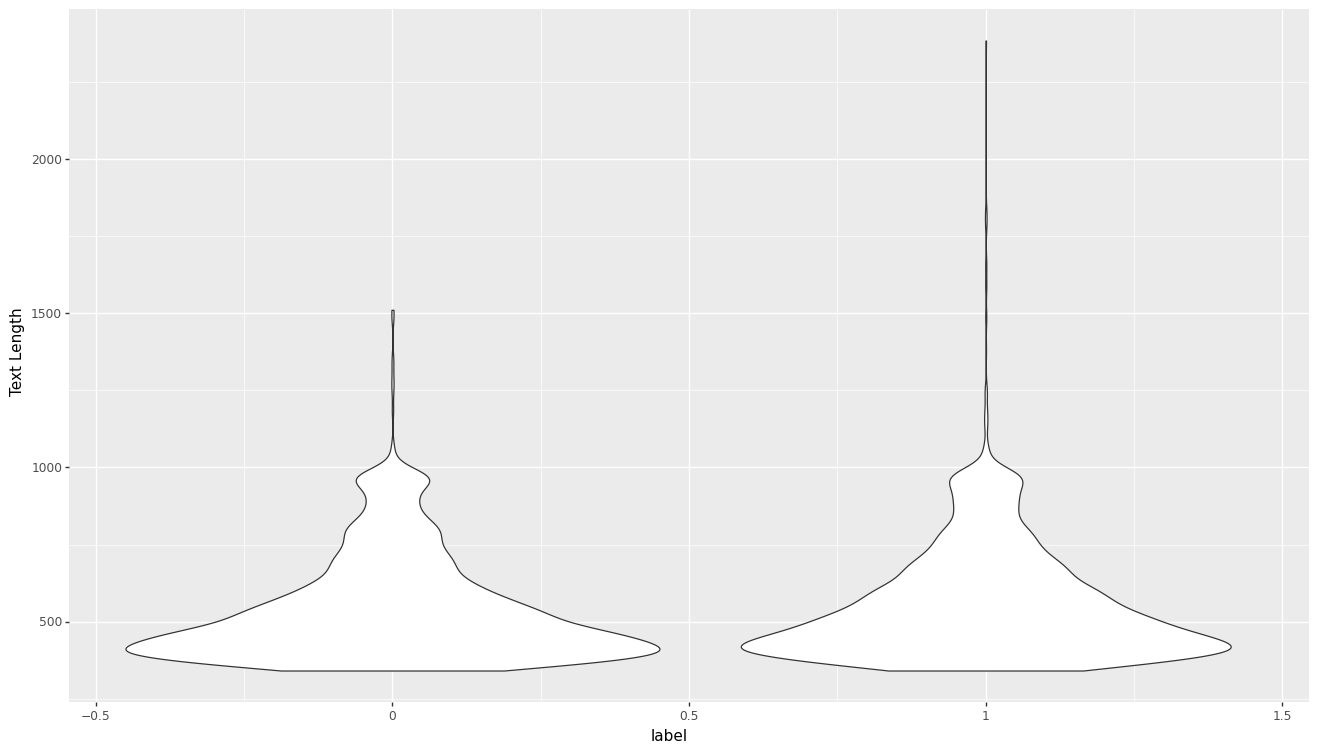

<ggplot: (400915447)>

In [8]:
p9.ggplot(
  pd.concat(list(get_top_N(3500))),
  p9.aes(x = 'label', y = 'length', group = 'label')
) + \
  p9.geom_violin() + \
  p9.theme_gray() + \
  p9.labs(y = 'Text Length') + \
  p9.theme(
    figure_size = (16, 9),
  )

In [9]:
top_N_all = pd.concat(list(get_top_N(3500)))
top_N_all[top_N_all['length'] >= 1024].shape[0] / top_N_all.shape[0] * 100

0.7428571428571429

# Top 1500 each

In [10]:
describe_top_N(1500)

Labels:
>> Train:
1    0.550667
0    0.449333
Name: label, dtype: float64
>> Validation:
1    0.555556
0    0.444444
Name: label, dtype: float64
>> Test:
1    0.554229
0    0.445771
Name: label, dtype: float64

Text length:
>> Train:
count    1500.000000
mean      728.890667
std       159.408078
min       548.000000
25%       606.750000
50%       690.000000
75%       813.250000
max      2386.000000
Name: length, dtype: float64
>> Validation:
count     495.000000
mean      689.519192
std       169.923331
min       502.000000
25%       565.000000
50%       650.000000
75%       773.000000
max      1830.000000
Name: length, dtype: float64
>> Test:
count    1005.000000
mean      682.417910
std       156.802165
min       503.000000
25%       557.000000
50%       638.000000
75%       778.000000
max      1659.000000
Name: length, dtype: float64


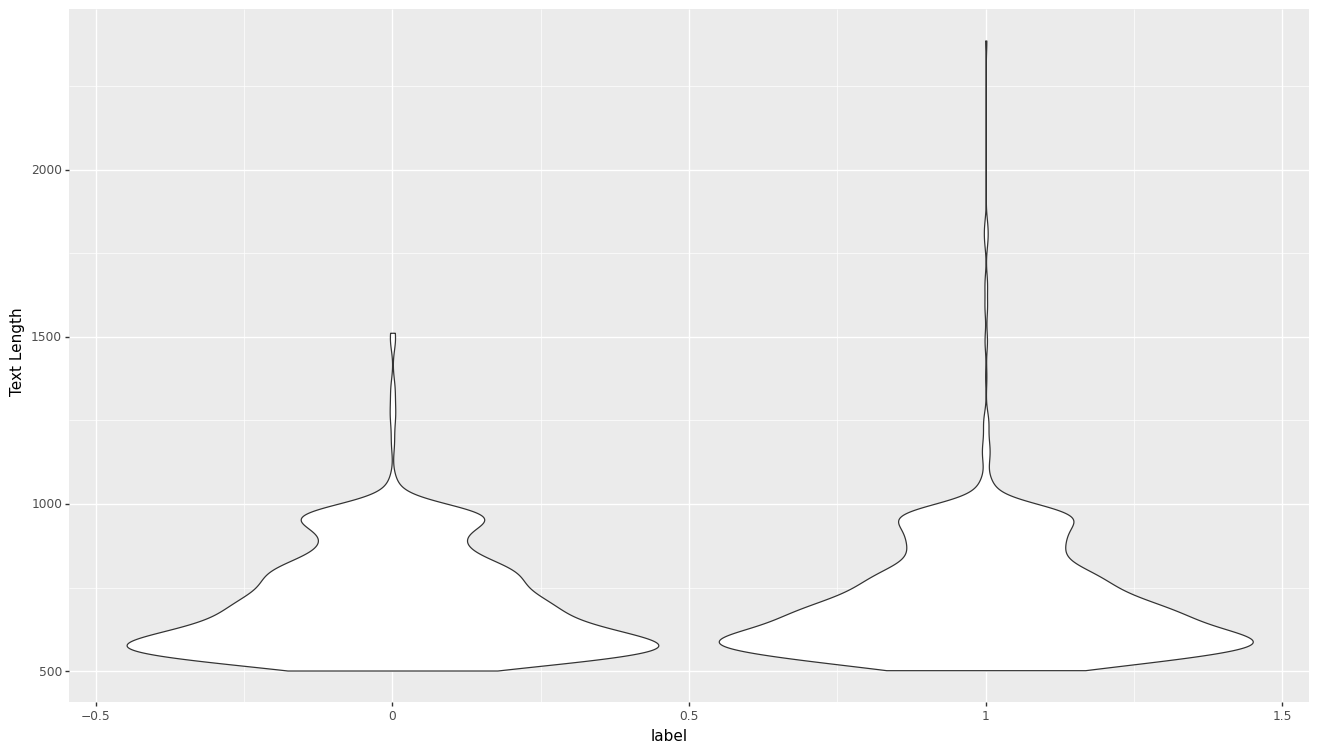

<ggplot: (815987169)>

In [11]:
p9.ggplot(
  pd.concat(list(get_top_N(1500))),
  p9.aes(x = 'label', y = 'length', group = 'label')
) + \
  p9.geom_violin() + \
  p9.theme_gray() + \
  p9.labs(y = 'Text Length') + \
  p9.theme(
    figure_size = (16, 9),
  )

In [12]:
top_N_all = pd.concat(list(get_top_N(1500)))
top_N_all[top_N_all['length'] >= 1024].shape[0] / top_N_all.shape[0] * 100

1.7333333333333332

# Top 1000 each

In [13]:
describe_top_N(1000)

Labels:
>> Train:
1    0.548
0    0.452
Name: label, dtype: float64
>> Validation:
1    0.563636
0    0.436364
Name: label, dtype: float64
>> Test:
1    0.564179
0    0.435821
Name: label, dtype: float64

Text length:
>> Train:
count    1000.000000
mean      800.268000
std       150.219686
min       629.000000
25%       690.000000
50%       770.000000
75%       892.250000
max      2386.000000
Name: length, dtype: float64
>> Validation:
count     330.000000
mean      743.036364
std       136.448233
min       582.000000
25%       633.000000
50%       708.500000
75%       821.250000
max      1589.000000
Name: length, dtype: float64
>> Test:
count     670.000000
mean      764.658209
std       157.477731
min       582.000000
25%       647.250000
50%       732.500000
75%       851.750000
max      1830.000000
Name: length, dtype: float64


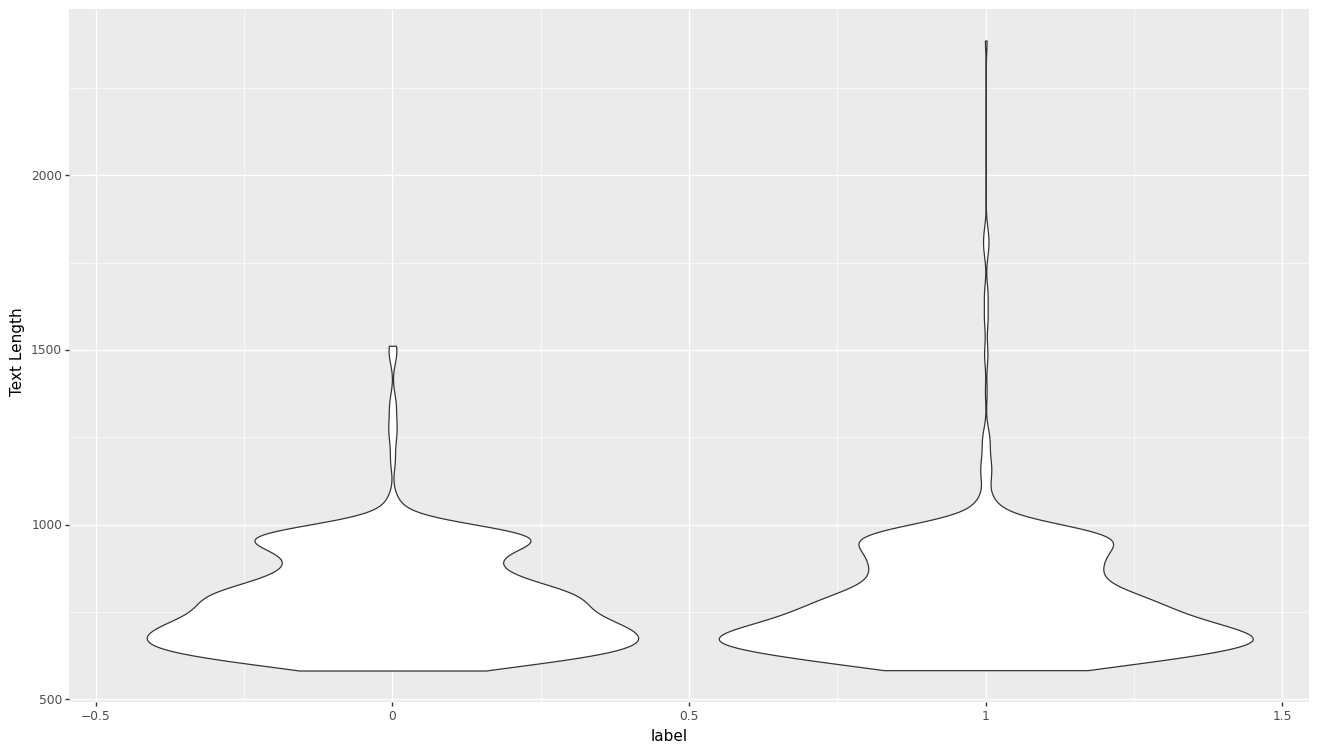

<ggplot: (273392523)>

In [14]:
p9.ggplot(
  pd.concat(list(get_top_N(1000))),
  p9.aes(x = 'label', y = 'length', group = 'label')
) + \
  p9.geom_violin() + \
  p9.theme_gray() + \
  p9.labs(y = 'Text Length') + \
  p9.theme(
    figure_size = (16, 9),
  )

In [15]:
top_N_all = pd.concat(list(get_top_N(1000)))
top_N_all[top_N_all['length'] >= 1024].shape[0] / top_N_all.shape[0] * 100

2.6

# Top 750 each

In [16]:
describe_top_N(750)

Labels:
>> Train:
1    0.541333
0    0.458667
Name: label, dtype: float64
>> Validation:
1    0.564516
0    0.435484
Name: label, dtype: float64
>> Test:
1    0.561753
0    0.438247
Name: label, dtype: float64

Text length:
>> Train:
count     750.000000
mean      847.345333
std       145.326048
min       690.000000
25%       746.000000
50%       813.500000
75%       933.500000
max      2386.000000
Name: length, dtype: float64
>> Validation:
count     248.000000
mean      800.725806
std       140.429206
min       643.000000
25%       684.500000
50%       771.500000
75%       889.750000
max      1830.000000
Name: length, dtype: float64
>> Test:
count     502.000000
mean      810.250996
std       144.711126
min       641.000000
25%       708.000000
50%       779.500000
75%       893.750000
max      1789.000000
Name: length, dtype: float64


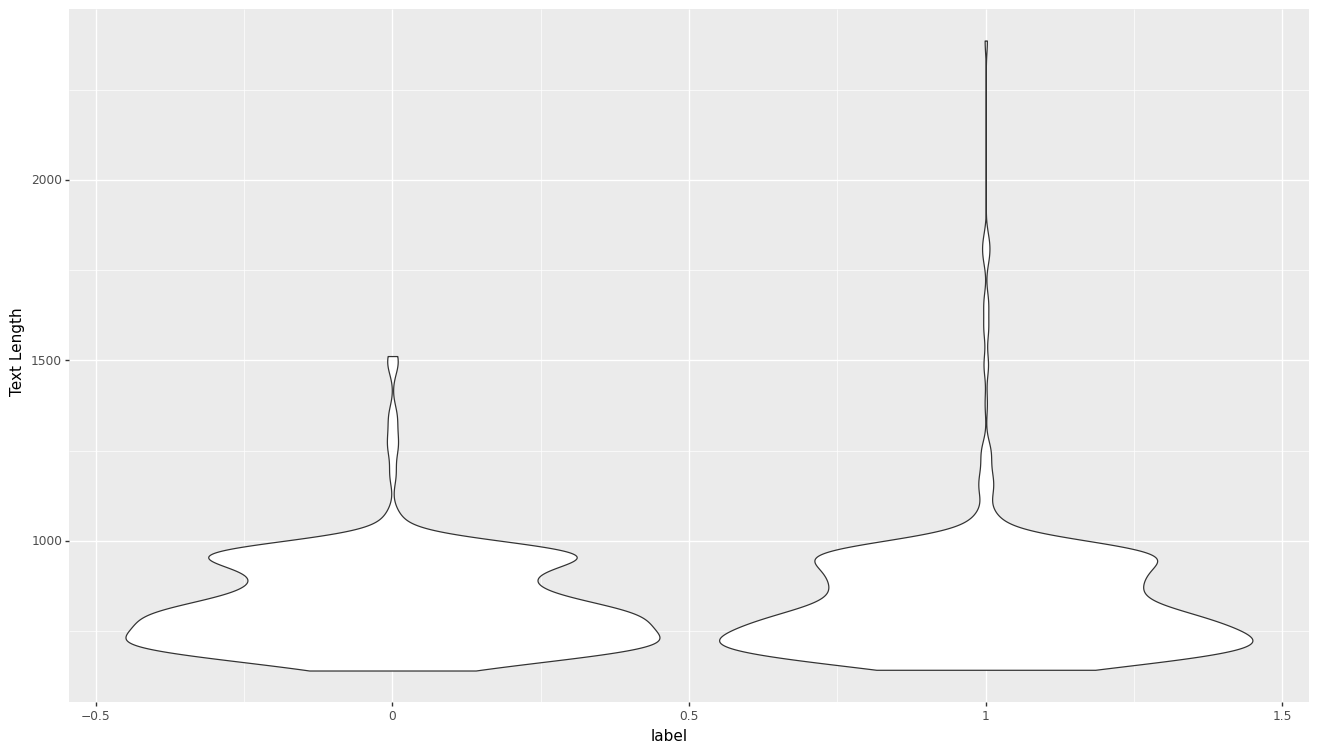

<ggplot: (817702504)>

In [17]:
p9.ggplot(
  pd.concat(list(get_top_N(750))),
  p9.aes(x = 'label', y = 'length', group = 'label')
) + \
  p9.geom_violin() + \
  p9.theme_gray() + \
  p9.labs(y = 'Text Length') + \
  p9.theme(
    figure_size = (16, 9),
  )

In [18]:
top_N_all = pd.concat(list(get_top_N(750)))
top_N_all[top_N_all['length'] >= 1024].shape[0] / top_N_all.shape[0] * 100

3.4666666666666663

# Top 500 each

In [19]:
describe_top_N(500)

Labels:
>> Train:
1    0.538
0    0.462
Name: label, dtype: float64
>> Validation:
1    0.551515
0    0.448485
Name: label, dtype: float64
>> Test:
1    0.549254
0    0.450746
Name: label, dtype: float64

Text length:
>> Train:
count     500.000000
mean      907.738000
std       143.044121
min       770.000000
25%       813.750000
50%       892.500000
75%       958.000000
max      2386.000000
Name: length, dtype: float64
>> Validation:
count     165.000000
mean      872.575758
std       131.955515
min       724.000000
25%       774.000000
50%       857.000000
75%       951.000000
max      1659.000000
Name: length, dtype: float64
>> Test:
count     335.000000
mean      869.907463
std       137.442096
min       723.000000
25%       778.000000
50%       844.000000
75%       943.000000
max      1830.000000
Name: length, dtype: float64


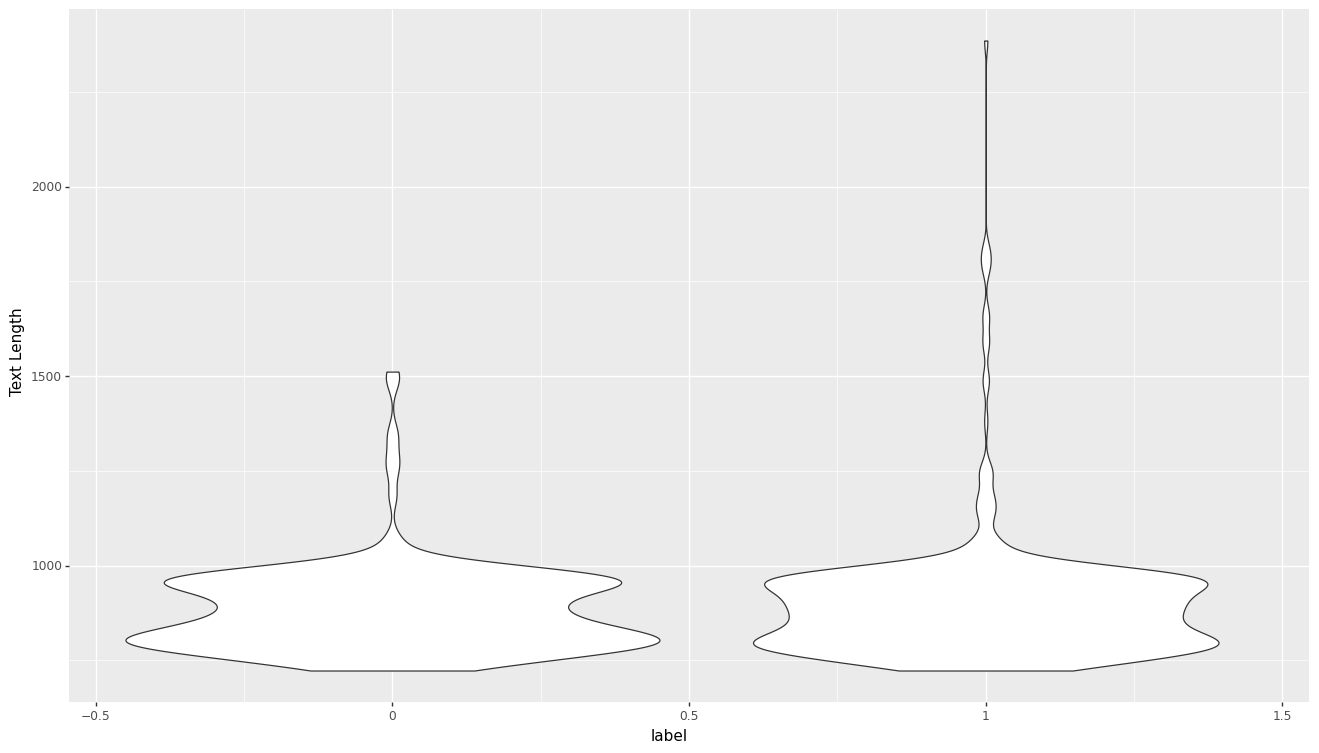

<ggplot: (809624147)>

In [20]:
p9.ggplot(
  pd.concat(list(get_top_N(500))),
  p9.aes(x = 'label', y = 'length', group = 'label')
) + \
  p9.geom_violin() + \
  p9.theme_gray() + \
  p9.labs(y = 'Text Length') + \
  p9.theme(
    figure_size = (16, 9),
  )

In [21]:
top_N_all = pd.concat(list(get_top_N(500)))
top_N_all[top_N_all['length'] >= 1024].shape[0] / top_N_all.shape[0] * 100

5.2

In [23]:
top_N_train, top_N_val, top_N_test = get_top_N(500)
top_N_train[top_N_train['length'] >= 1024].shape[0] / top_N_train.shape[0] * 100, top_N_val[top_N_val['length'] >= 1024].shape[0] / top_N_val.shape[0] * 100, top_N_test[top_N_test['length'] >= 1024].shape[0] / top_N_test.shape[0] * 100

(5.800000000000001, 4.848484848484849, 4.477611940298507)